In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
sns.set_style("darkgrid")
import sklearn

In [32]:
# choose between the normalized or standardized version of the data
air_data_all = pd.read_csv('data_4comp_std_labeled.csv', delimiter=',')

# select only the columns that pca will be used on
cols = ["PM2.5","PM10","NO2","O3"]   
air_data= air_data_all[cols]

#data converted to np array for easier indexing
air_data_np = np.array(air_data)

# colums with the ratings: categories 1,2,3,4
ratings = air_data_all['cat'] 
cat_labels = ["very low air quality", "low air quality", "medium air quality",  "good air quality"]

In [33]:
# calculation of svd
u, s, vh = np.linalg.svd(air_data, 
                         full_matrices=True) 
eigenval, eigenvec = s ** 2, vh

In [34]:
print(vh)

[[-0.53439699 -0.52622558 -0.53376742  0.39063901]
 [-0.37875802 -0.41123258  0.19482816 -0.80589833]
 [-0.19579188 -0.3027146   0.81991876  0.44470512]
 [ 0.72981351 -0.67995461 -0.06976788 -0.01289986]]


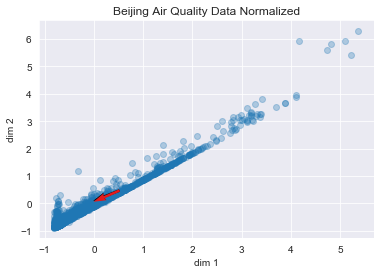

In [47]:
ax = sns.regplot(x=air_data_np[:,0],
            y= air_data_np[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3})

# Draw the Unit EigenVectors
plt.quiver(0.5, 0.5, vh[0,0],vh[1,0], scale_units='xy', angles='xy', scale=1, color = '#000000')
plt.quiver(0.5, 0.5, vh[0,1],vh[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
ax.set(xlabel='dim 1', 
       ylabel='dim 2',
       title='Beijing Air Quality Data Normalized');

In [36]:
## Calculate the coordinates of the data points in the projection axes of the space spanned 
## by the leading eigenvectors contained in $U$ 
u1 = u[:,0] * s[0] 
u2 = u[:,1] * s[1] 

<BarContainer object of 4 artists>

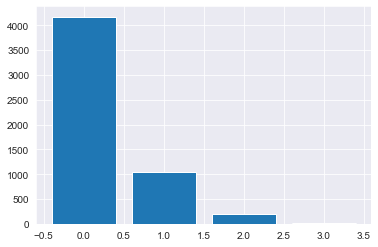

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

# Sort eigenvectors (and -values) by descending order of eigenvalues.
sort = np.argsort(-eigenval)
eigenval = eigenval[sort]
eigenvec = eigenvec[:,sort]

# To get an idea of the eigenvalues we plot them.
figure = plt.figure('Eigenvalue comparison')
plt.bar(np.arange(len(eigenval)), eigenval)

In [38]:
project_data_featureloading = np.dot(air_data_sel, vh.T) # Transpose feature loadings 'vh'
v_norm = np.dot(vh.T,vh)

In [39]:
Us_eig = np.dot(u[:,0:4], np.diag(s)) 

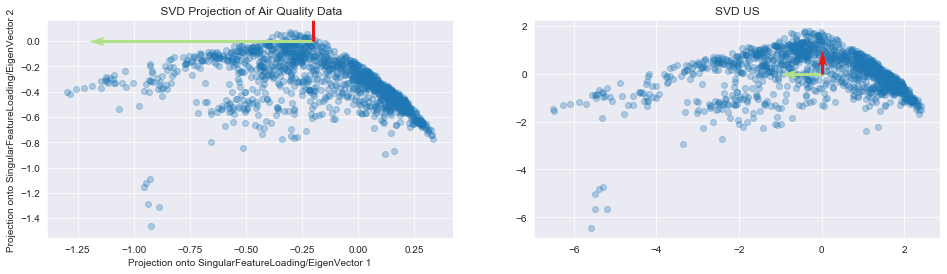

In [40]:
fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(16,4))

sns.regplot(x= project_data_featureloading[:,0],
            y= project_data_featureloading[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3},ax=ax1)
ax1.quiver(-0.2, 0, -v_norm[0,0], v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = '#b2df8a') # green arrow
ax1.quiver(-0.2, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c') #red arrow
ax1.set(xlabel='Projection onto SingularFeatureLoading/EigenVector 1', 
       ylabel='Projection onto SingularFeatureLoading/EigenVector 2',
       title=' SVD Projection of Air Quality Data');

sns.regplot(x=Us_eig[:,0],
            y=Us_eig[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3},ax=ax2)
ax2.quiver(0, 0, -v_norm[0,0], v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = '#b2df8a')
ax2.quiver(0, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
ax2.set(xlabel='', 
       ylabel='',
       title='SVD US');

Anmerkung der Redaktion: 
- US steht für singular vectors (U) x singular value matrix (S) 
- $U$ contains $r$ **singular vectors** corresponding to the eigenvectors of $XX^\intercal$;
- $S$ is $N \times feature$ matrix with $r \times r$ diagonal submatrix of corresponding **singular values** sorted in the descending order.
- $XV= U S V^\intercal V= U S.$
- -> columns are uncorrelated

## Aber warum sind da auf dem letzten plot die Achsen so komisch? Und wo ist überhaupt der Unterschied zwischen dem linken und rechten plot? 

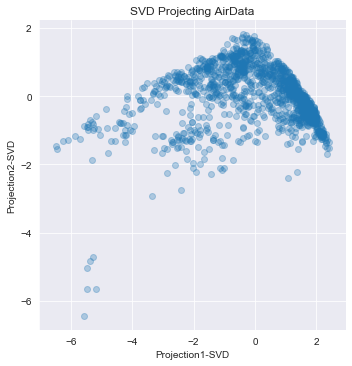

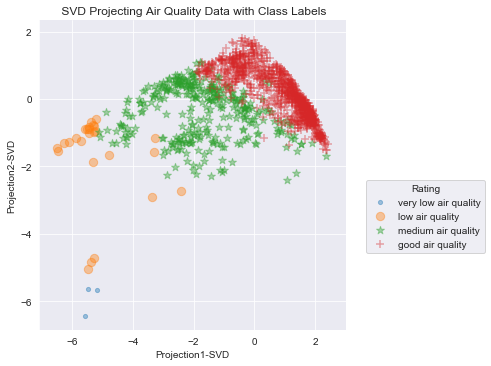

In [41]:
# set data to a Pandas Dataframa to ease plotting
names = ["U_"+str(x+1) for x in range(2)]
names.append('cat')
ds_us = pd.DataFrame(data= np.c_[u1, u2,ratings], 
                     columns=names)

# 1st plot
ax = sns.lmplot('U_1', 
                'U_2', 
                data=ds_us, 
                fit_reg=False,
                scatter_kws={'alpha':0.3});
ax.set(xlabel='Projection1-SVD', 
           ylabel='Projection2-SVD',
           title='SVD Projecting AirData');

# 2nd plot
ax2 = sns.lmplot('U_1', 
               'U_2', 
               data=ds_us, 
               hue='cat', 
               markers=['.','o', '*','+'],
               fit_reg=False,
               scatter_kws={'alpha':0.4, "s": 70}, 
               legend_out=False);
ax2.set(xlabel='Projection1-SVD', 
       ylabel='Projection2-SVD',
       title=' SVD Projecting Air Quality Data with Class Labels');
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Rating', labels = cat_labels);

In [42]:
# By SVD
projected_x= np.dot(air_data_sel,vh.T)
v_norm= np.dot(vh.T, vh)

#print(projected_x.shape)
#print(labels.shape)
names = ["SVD-PC_"+str(x+1) for x in range(2)]
names.append('cat')
ds_svd = pd.DataFrame(data= np.c_[projected_x[:,0:2], air_data_all.cat], 
                      columns=names)
ds_svd['cat'] = ds_svd['cat'].astype(int)

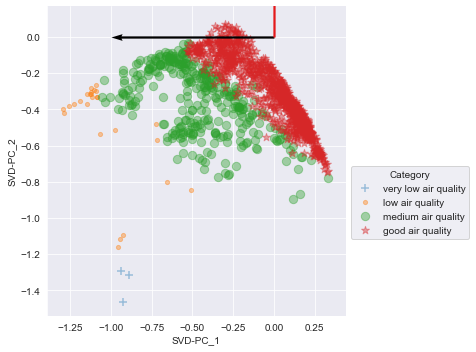

In [43]:
sns.lmplot('SVD-PC_1', 
           'SVD-PC_2', 
           data=ds_svd, 
           hue='cat', 
           markers=['+','.','o','*'],
           fit_reg=False,
           scatter_kws={'alpha':0.4, "s": 70}, 
           legend_out=False, height=5)
plt.quiver(0, 0, -v_norm[0,0],v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = '#000000')
plt.quiver(0, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
plt.legend(bbox_to_anchor=(1, 0.5), title='Category', labels = cat_labels);

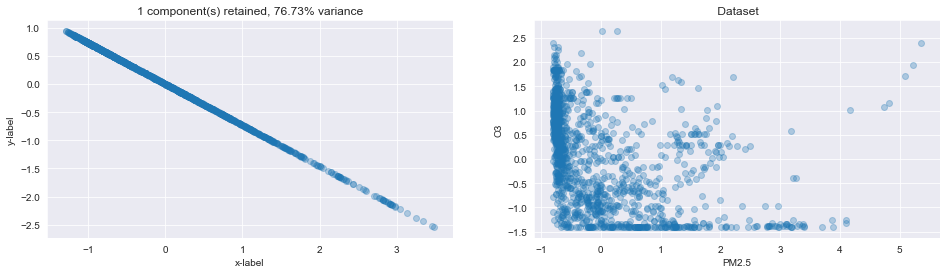

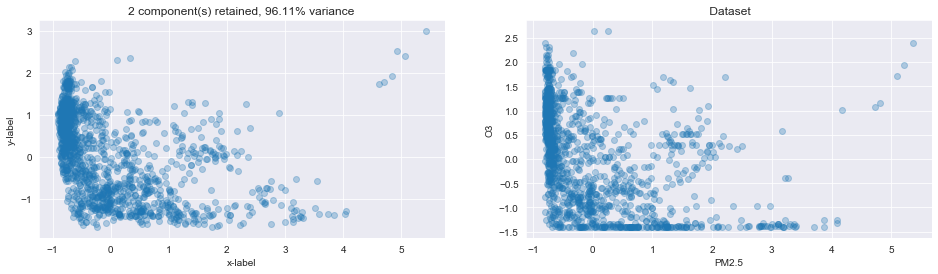

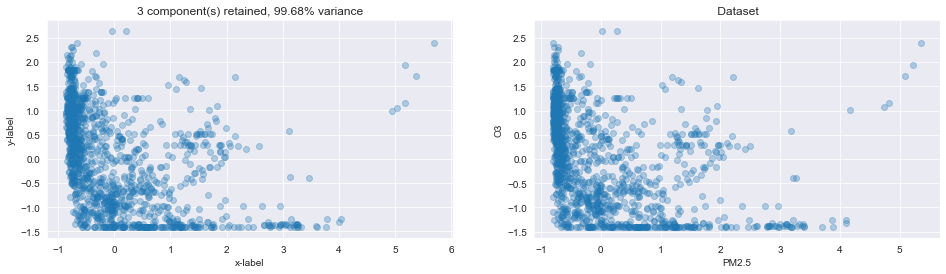

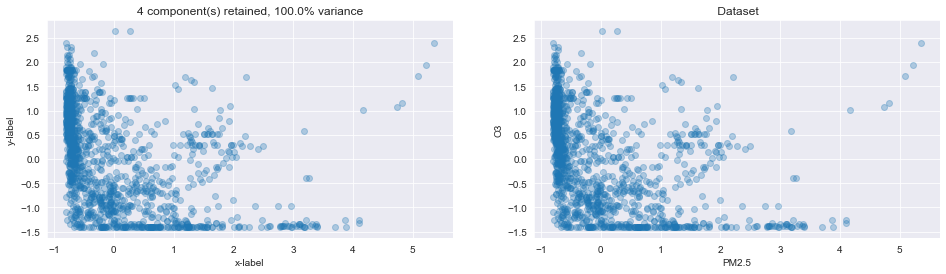

In [44]:
r = air_data.shape[1]
var_explained = np.cumsum(s**2)/np.sum(s**2)*100;

# You can change the features you would like to display, from 0 to 10
# ["PM2.5","PM10","NO2","O3"]

f1=0   #pm2.5
f2=3   #o3

approx = []
for n in range(1,r+1):
    approximation = np.dot((u[:,:n] * s[:n]),vh[:n,:]) 
    
    approx.append(approximation)
    
    fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(16,4))
    
    sns.regplot(x=approximation[:,f1],
                y=approximation[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax1)
    ax1.set(xlabel= 'x-label', 
           ylabel= 'y-label',
           title= (str(n) 
                   + ' component(s) retained, ' 
                   + str(round(var_explained[n-1],2)) 
                   + '% variance'))
    

    sns.regplot(x=np.array(air_data)[:,f1],
                y=np.array(air_data)[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax2)
    ax2.set(xlabel='PM2.5', 
           ylabel= 'O3',
           title=' Dataset');